# ACF and PACF Plots

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm # for auto correlation and pacf plots

%matplotlib inline

In [2]:
data = pd.read_pickle('C:\\Users\\z0047cfr\\Project Work\\Factory Demand Model\\Input Data\\Labor_Demand.pkl')

Step 1: select the start period

In [3]:
df = data.to_frame()
df = df['2016-06-01':]
df.index.freq = 'MS'
df.head()

,data
Month,
2016-06-01,89.0
2016-07-01,99.0
2016-08-01,105.0
2016-09-01,104.0
2016-10-01,105.0


#  Outlier Detection

In [4]:
%run Outlier_Detection.ipynb

In [7]:
#Check  outliers using standard deviation
#outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask = df.apply(out_std, nstd=3.0)
out_std(df['data'], nstd=2.0)
# first 10 elements
outlier_mask[outlier_mask['data'] ==True]

,data
Month,


No outliers in data using STD - there are no outlier points - points which are more than three standard deviations away.

In [34]:
#Check  outliers using IQR
# For comparison, make one array each at varying values of k.
iqr1 = df.apply(out_iqr, k=1.5)
iqr1[iqr1['data'] ==1]

,data
Month,


 No outliers in data using inter quartile range which are more than 1.5 ranges way.

# Outliers on Differenced data

In [36]:
df['data_diff1'] = ((df['data']) - (df['data'].shift(1))).dropna()

In [41]:
#Check  outliers using standard deviation
#outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask = df.apply(out_std, nstd=3)
out_std(df['data_diff1'], nstd=2.0)
# first 10 elements
outlier_mask[outlier_mask['data_diff1'] ==True]

,data,data_diff1
Month,,
2019-05-01,False,True


In [38]:
#Check  outliers using IQR
# For comparison, make one array each at varying values of k.
iqr1 = df.apply(out_iqr, k=1.5)
iqr1[iqr1['data_diff1'] ==1]

,data,data_diff1
Month,,


# ACF and PACF

In [23]:
# Take first difference of data as the differencing for model 
# COnfirm the value of d in ARIMA(p,d,q) by running ADF on first difference
x = np.array(((df['data']) - (df['data'].shift(1))).dropna())

### Inferencing from Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags
    

In [7]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# ACF and PACF - Actual Series


C:\Users\z0047cfr\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


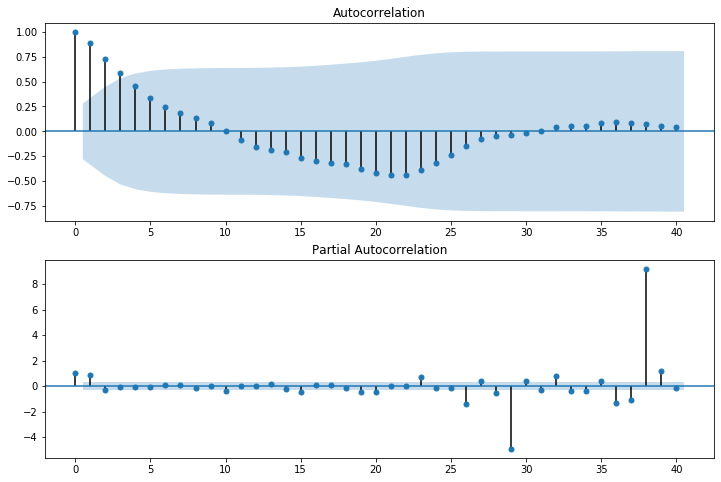

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['data'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['data'],lags=40,ax=ax2)
# note changing metod to ywmle since there are negative values and its square root while calculating cretes error

# ACF and PACF - First Difference Series


#### It is crucial to take the ACF and PACF of the differenced series incase differencing is required for  the model. 

#### Since we are going to use first difference in the model we need to chek the AR and MA components of the differenced series

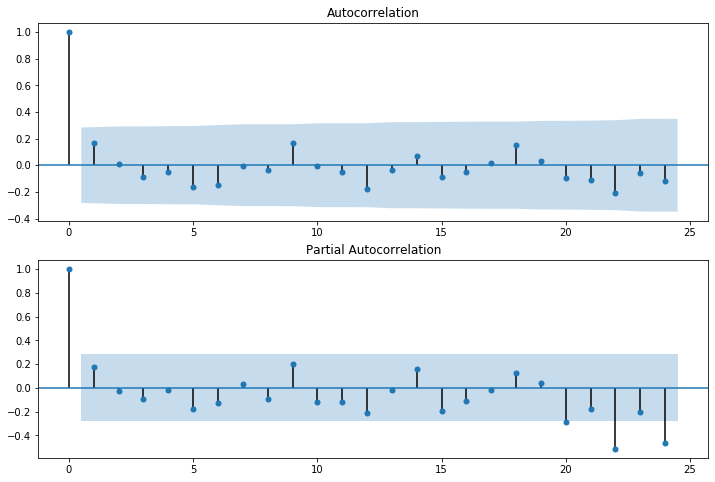

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(x,lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(x,lags=24,ax=ax2)
# note changing metod to ywmle since there are negative values and its square root while calculating cretes error

THe ACF component indicates not more than 0 MAor 1 MA terms in the model

THe PACF component indicates ot more than 0 AR or 1 AR terms in the model

We will create versions of ARIMA models and select the mode with the Best FIt